In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
df=pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.shape

(1258, 5)

In [5]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
#Changing the datatype of close and volume t ofloat
df['Close']=df['Close'].str.replace(',','').astype(float)
df['Volume']=df['Volume'].str.replace(',','').astype(float)

In [7]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [9]:
training_set

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04
...,...
2016-12-23,790.90
2016-12-27,790.68
2016-12-28,793.70


In [10]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
#creating a data structure with 100 time steps and 1 output
X_train=[]
y_train=[]
for i in range(100,1258):
    X_train.append(training_set_scaled[i-100:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


In [12]:
#reshaping 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [13]:
X_train.shape

(1158, 100, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [15]:
#creating the model RNN
model = Sequential()
#adding the first LSTM layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

#adding the second LSTM layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

#adding the third LSTM layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

#adding the fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#adding the output layer
model.add(Dense(units=1))

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [17]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
37/37 [==============================] - 11s 98ms/step - loss: 0.0510
Epoch 2/100
37/37 [==============================] - 4s 95ms/step - loss: 0.0087
Epoch 3/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0066
Epoch 4/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0051
Epoch 5/100
37/37 [==============================] - 4s 102ms/step - loss: 0.0050
Epoch 6/100
37/37 [==============================] - 4s 107ms/step - loss: 0.0053
Epoch 7/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0054
Epoch 8/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0047
Epoch 9/100
37/37 [==============================] - 4s 95ms/step - loss: 0.0054
Epoch 10/100
37/37 [==============================] - 4s 95ms/step - loss: 0.0049
Epoch 11/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0044
Epoch 12/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0042
Epoch 13/100
37/37

In [20]:
df_test=pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date',parse_dates=True)

In [21]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [36]:
df_test.shape

(20, 5)

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [24]:
df_test['Volume']=df_test['Volume'].str.replace(',','').astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [44]:
real_stock_price=df_test.iloc[:,1:2].values

In [26]:
test_set=df_test['Open']
test_set=pd.DataFrame(test_set)

In [28]:
test_set.head()

,Open
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40


In [30]:
#getting the predicted stock price of 2017
dataset_total=pd.concat((df['Open'],df_test['Open']),axis=0)

In [31]:
dataset_total

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2017-01-25    829.62
2017-01-26    837.81
2017-01-27    834.71
2017-01-30    814.66
2017-01-31    796.86
Name: Open, Length: 1278, dtype: float64

In [32]:
dataset_total.shape

(1278,)

In [35]:
dataset_total.tail(12)

Date
2017-01-13    807.48
2017-01-17    807.08
2017-01-18    805.81
2017-01-19    805.12
2017-01-20    806.91
2017-01-23    807.25
2017-01-24    822.30
2017-01-25    829.62
2017-01-26    837.81
2017-01-27    834.71
2017-01-30    814.66
2017-01-31    796.86
Name: Open, dtype: float64

In [39]:
inputs=dataset_total[len(dataset_total)-len(df_test)-100:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(100,120):
    X_test.append(inputs[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 1s/step


In [40]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)


In [41]:
predicted_stock_price

,0
0,801.570557
1,798.894714
2,799.754028
3,801.396545
4,805.054321
5,811.155090
6,816.092957
7,817.449036
8,817.341248
9,816.999512


In [42]:
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


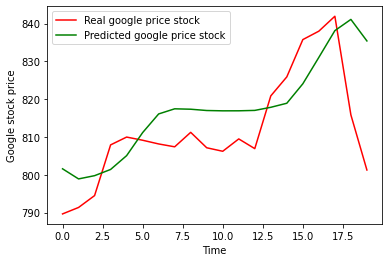

In [46]:
#visualize the result
plt.plot(real_stock_price,color='r',label='Real google price stock')
plt.plot(predicted_stock_price,color='g',label='Predicted google price stock')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()